# Project Three Notebook Example

For your final notebook, feel free to duplicate this notebook and edit as needed. 


## Load Some Stuff

This is where we load libraires and the like so we can do what we need. If you get an error saying a module is not loaded, open a new terminal/cmd line and try running: `pip install [module name]`. 

In [1]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [2]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('Jail.csv', parse_dates=[0]) 
raw_data_df.head()

,white non,white hispanic,black non,black hispanic,american indian non,Sex,Race,Recidivism
0,1,0,0,0,0,1,1,1
1,1,0,0,0,0,0,1,1
2,1,0,0,0,0,1,1,1
3,1,0,0,0,0,1,1,1
4,1,0,0,0,0,1,1,1


In [50]:
# You can explore unique entires by stating the column and using .unique() like this:
print(raw_data_df["race"].unique())
print(raw_data_df["Recidivism"].unique())

['1' '2' '0' 'nan']
[1 0]


In [60]:
# You can explore rows with a specific value like so
raw_data_df[raw_data_df["white non"]==1].head() # remove .head() to see all entires

,white non,white hispanic,black non,black hispanic,american indian non,Recidivism


In [61]:
# You can count the number of rows like so
print("Size of entire table: %s "%len(raw_data_df))
print("Size of entires matching filter: %s "%len(raw_data_df[raw_data_df["white non"]==0]))

Size of entire table: 100 
Size of entires matching filter: 0 


In [6]:
# You can invert a match by using the 'not equal' evaluation.
print("Size of entires matching filter: %s "%len(raw_data_df[raw_data_df["What.is.your.annual.household.income."]!='R']))
raw_data_df[raw_data_df["What.is.your.annual.household.income."]!='R'].head()

Size of entires matching filter: 6025 


,Combined_ID,Year,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,How.satisfied.are.you.with.Somerville.as.a.place.to.live.,In.general..how.similar.are.you.to.other.people.you.know._2011,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.,How.satisfied.are.you.with.your.neighborhood.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,...,What.is.your.race.or.ethnicity._2015,Do.you.have.children.age.18.or.younger.who.live.with.you.,Describe.your.housing.status.in.Somerville.,Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.,How.long.have.you.lived.here.,What.is.your.annual.household.income.,What.neighborhood.do.you.live.in.,Are.you.a.student.,Ward,Precinct
0,1,2015,7,5,7,NaN,NaN,5.0,9.0,3.0,...,"White, Hispanic / Latino",No,Rent,No,4-7 years,"$100,000 to $149,999",Winter Hill,No,4.0,3.0
1,2,2015,8,8,7,NaN,NaN,8.0,7.0,3.0,...,White,No,Rent,Yes,1-3 years,"$25,000 to $49,999",Teele Square,Yes,7.0,2.0
2,3,2015,5,9,6,NaN,NaN,7.0,5.0,3.0,...,White,No,Rent,No,21 years or more,"$25,000 to $49,999",Ward 3,No,3.0,2.0
3,4,2015,5,8,9,NaN,NaN,9.0,9.0,5.0,...,White,No,Own,No,16-20 years,NaN,Union Square,No,3.0,1.0
4,5,2015,7,9,8,NaN,NaN,7.0,7.0,5.0,...,White,Yes,Own,No,4-7 years,"$150,000 or more",Near the hospital,No,5.0,3.0


In [7]:
# You can make a new table from your filtered rows like so
processed_data_df = raw_data_df[raw_data_df["What.is.your.annual.household.income."]!='R']
processed_data_df = processed_data_df[processed_data_df["Age."]!='R']
# Note how I filtered first on raw_data_df and then on processed_data_df

# Now let's remove all students
processed_data_df = processed_data_df[processed_data_df["Are.you.a.student."]!='Yes']

# So how many entires are there?
print("Size of entire table: %s "%len(processed_data_df))
# Let's peak at the table.
processed_data_df.head()

Size of entire table: 5947 


,Combined_ID,Year,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,How.satisfied.are.you.with.Somerville.as.a.place.to.live.,In.general..how.similar.are.you.to.other.people.you.know._2011,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.,How.satisfied.are.you.with.your.neighborhood.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,...,What.is.your.race.or.ethnicity._2015,Do.you.have.children.age.18.or.younger.who.live.with.you.,Describe.your.housing.status.in.Somerville.,Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.,How.long.have.you.lived.here.,What.is.your.annual.household.income.,What.neighborhood.do.you.live.in.,Are.you.a.student.,Ward,Precinct
0,1,2015,7,5,7,NaN,NaN,5.0,9.0,3.0,...,"White, Hispanic / Latino",No,Rent,No,4-7 years,"$100,000 to $149,999",Winter Hill,No,4.0,3.0
2,3,2015,5,9,6,NaN,NaN,7.0,5.0,3.0,...,White,No,Rent,No,21 years or more,"$25,000 to $49,999",Ward 3,No,3.0,2.0
3,4,2015,5,8,9,NaN,NaN,9.0,9.0,5.0,...,White,No,Own,No,16-20 years,NaN,Union Square,No,3.0,1.0
4,5,2015,7,9,8,NaN,NaN,7.0,7.0,5.0,...,White,Yes,Own,No,4-7 years,"$150,000 or more",Near the hospital,No,5.0,3.0
6,7,2015,10,10,10,NaN,NaN,10.0,10.0,5.0,...,White,No,Own,No,21 years or more,"$150,000 or more",Prospect Hill,No,3.0,1.0


In [8]:
# for the special case of when a calue is NaN, you can filter based on the value not being null (i.e., empty)
processed_data_df = processed_data_df[pd.notnull(processed_data_df["What.is.your.annual.household.income."])]
processed_data_df = processed_data_df[pd.notnull(processed_data_df["Age."])]
print("Size of entire table: %s "%len(processed_data_df)) # in the example data, this gets rid of a few rows
processed_data_df.head()

Size of entire table: 5888 


,Combined_ID,Year,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,How.satisfied.are.you.with.Somerville.as.a.place.to.live.,In.general..how.similar.are.you.to.other.people.you.know._2011,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.,How.satisfied.are.you.with.your.neighborhood.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,...,What.is.your.race.or.ethnicity._2015,Do.you.have.children.age.18.or.younger.who.live.with.you.,Describe.your.housing.status.in.Somerville.,Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.,How.long.have.you.lived.here.,What.is.your.annual.household.income.,What.neighborhood.do.you.live.in.,Are.you.a.student.,Ward,Precinct
0,1,2015,7,5,7,NaN,NaN,5.0,9.0,3.0,...,"White, Hispanic / Latino",No,Rent,No,4-7 years,"$100,000 to $149,999",Winter Hill,No,4.0,3.0
2,3,2015,5,9,6,NaN,NaN,7.0,5.0,3.0,...,White,No,Rent,No,21 years or more,"$25,000 to $49,999",Ward 3,No,3.0,2.0
4,5,2015,7,9,8,NaN,NaN,7.0,7.0,5.0,...,White,Yes,Own,No,4-7 years,"$150,000 or more",Near the hospital,No,5.0,3.0
6,7,2015,10,10,10,NaN,NaN,10.0,10.0,5.0,...,White,No,Own,No,21 years or more,"$150,000 or more",Prospect Hill,No,3.0,1.0
7,8,2015,7,8,8,NaN,NaN,4.0,7.0,3.0,...,White,No,Own,No,16-20 years,"$75,000 to $99,999","East Somerville, MA",No,1.0,3.0


In [9]:
# You can remove unwanted colums like so
# for a single column
processed_data_df = processed_data_df.drop('In.general..how.similar.are.you.to.other.people.you.know._2011', 1)
# for multiple columns
processed_data_df = processed_data_df.drop([
                                            'How.satisfied.are.you.with.Somerville.as.a.place.to.live.',
                                            'How.satisfied.are.you.with.your.neighborhood.'
                                           ], 1)
processed_data_df.head()

,Combined_ID,Year,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,When.making.decisions..are.you.more.likely.to.seek.advice.or.decide.for.yourself._2011.,How.proud.are.you.to.be.a.Somerville.resident._2015,How.would.you.rate.the.following..The.availability.of.information.about.city.services._2015,The.availability.of.affordable.housing_2011,How.would.you.rate.the.following..The.cost.of.housing.,How.would.you.rate.the.following..The.overall.quality.of.public.schools.in.your.community._2011,...,What.is.your.race.or.ethnicity._2015,Do.you.have.children.age.18.or.younger.who.live.with.you.,Describe.your.housing.status.in.Somerville.,Do.you.plan.to.move.away.from.Somerville.in.the.next.two.years.,How.long.have.you.lived.here.,What.is.your.annual.household.income.,What.neighborhood.do.you.live.in.,Are.you.a.student.,Ward,Precinct
0,1,2015,7,5,NaN,9.0,3.0,NaN,2.0,NaN,...,"White, Hispanic / Latino",No,Rent,No,4-7 years,"$100,000 to $149,999",Winter Hill,No,4.0,3.0
2,3,2015,5,9,NaN,5.0,3.0,NaN,2.0,NaN,...,White,No,Rent,No,21 years or more,"$25,000 to $49,999",Ward 3,No,3.0,2.0
4,5,2015,7,9,NaN,7.0,5.0,NaN,4.0,NaN,...,White,Yes,Own,No,4-7 years,"$150,000 or more",Near the hospital,No,5.0,3.0
6,7,2015,10,10,NaN,10.0,5.0,NaN,5.0,NaN,...,White,No,Own,No,21 years or more,"$150,000 or more",Prospect Hill,No,3.0,1.0
7,8,2015,7,8,NaN,7.0,3.0,NaN,1.0,NaN,...,White,No,Own,No,16-20 years,"$75,000 to $99,999","East Somerville, MA",No,1.0,3.0


In [10]:
# Alternativly, if you want to make a new table from a subset of columns, you can do so like this.
processed_data_df = processed_data_df[[
                                        'How.happy.do.you.feel.right.now.', 
                                        'How.satisfied.are.you.with.your.life.in.general.', 
                                        'What.is.your.annual.household.income.',
                                        'Age.'
                                     ]].copy()
processed_data_df.head()

,How.happy.do.you.feel.right.now.,How.satisfied.are.you.with.your.life.in.general.,What.is.your.annual.household.income.,Age.
0,7,5,"$100,000 to $149,999",35-44
2,5,9,"$25,000 to $49,999",65-74
4,7,9,"$150,000 or more",25-34
6,10,10,"$150,000 or more",55-64
7,7,8,"$75,000 to $99,999",55-64


In [11]:
# You can rename columns like so.
processed_data_df = processed_data_df.rename(columns={
                                                        'How.happy.do.you.feel.right.now.': 'happy', 
                                                        'How.satisfied.are.you.with.your.life.in.general.': 'satisfied',
                                                        'What.is.your.annual.household.income.': 'income',
                                                        'Age.': 'age',
                                                     })
processed_data_df.head()

,happy,satisfied,income,age
0,7,5,"$100,000 to $149,999",35-44
2,5,9,"$25,000 to $49,999",65-74
4,7,9,"$150,000 or more",25-34
6,10,10,"$150,000 or more",55-64
7,7,8,"$75,000 to $99,999",55-64


In [12]:
# You can replace values in a column based on logic like so
# Note: I used the unique values found above to inform my logic.
# That is, I took the unique text lables and translated them into numbers.
# It's clear that different surveys had different buckets. So I probably 
# sould limit myself to years using the same metrics, but for our purposes
# I'm just going to run with a quick and dirty translation. 

processed_data_df.loc[processed_data_df['income'] == 'Less than $10,000', 'income'] = 5000 
processed_data_df.loc[processed_data_df['income'] == '10,000 - $19,999', 'income'] = 15000
processed_data_df.loc[processed_data_df['income'] == '$10,000 to $24,999', 'income'] = 17500
processed_data_df.loc[processed_data_df['income'] == '20,000 - $29,999', 'income'] = 25000
processed_data_df.loc[processed_data_df['income'] == '$25,000 to $49,999', 'income'] = 37500
processed_data_df.loc[processed_data_df['income'] == '30,000 - $39,999', 'income'] = 35000
processed_data_df.loc[processed_data_df['income'] == '40,000 - $49,999', 'income'] = 45000
processed_data_df.loc[processed_data_df['income'] == '50,000 - $59,999', 'income'] = 55000
processed_data_df.loc[processed_data_df['income'] == '$50,000 to $74,999', 'income'] = 62500
processed_data_df.loc[processed_data_df['income'] == '60,000 - $69,999', 'income'] = 65000
processed_data_df.loc[processed_data_df['income'] == '70,000 - $79,999', 'income'] = 75000
processed_data_df.loc[processed_data_df['income'] == '$75,000 to $99,999', 'income'] = 87500
processed_data_df.loc[processed_data_df['income'] == '80,000 - $89,999', 'income'] = 85000
processed_data_df.loc[processed_data_df['income'] == '90,000 - $99,999', 'income'] = 95000
processed_data_df.loc[processed_data_df['income'] == '100,000 and up', 'income'] = 100000
processed_data_df.loc[processed_data_df['income'] == '$100,000 to $149,999', 'income'] = 125000 
processed_data_df.loc[processed_data_df['income'] == '$150,000 or more', 'income'] = 150000

processed_data_df.loc[processed_data_df['age'] == '18-21', 'age'] = 24
processed_data_df.loc[processed_data_df['age'] == '18-24', 'age'] = 21
processed_data_df.loc[processed_data_df['age'] == '22-25', 'age'] = 23.5
processed_data_df.loc[processed_data_df['age'] == '25-34', 'age'] = 29.5
processed_data_df.loc[processed_data_df['age'] == '26-30', 'age'] = 28
processed_data_df.loc[processed_data_df['age'] == '31-40', 'age'] = 35.5
processed_data_df.loc[processed_data_df['age'] == '35-44', 'age'] = 39.5
processed_data_df.loc[processed_data_df['age'] == '41-50', 'age'] = 46.5
processed_data_df.loc[processed_data_df['age'] == '45-54', 'age'] = 48
processed_data_df.loc[processed_data_df['age'] == '51-60', 'age'] = 55.5
processed_data_df.loc[processed_data_df['age'] == '55-64', 'age'] = 58
processed_data_df.loc[processed_data_df['age'] == '61+', 'age'] = 61
processed_data_df.loc[processed_data_df['age'] == '65-74', 'age'] = 69.5
processed_data_df.loc[processed_data_df['age'] == '75 or older', 'age'] = 75
processed_data_df.head()


,happy,satisfied,income,age
0,7,5,125000,39.5
2,5,9,37500,69.5
4,7,9,150000,29.5
6,10,10,150000,58
7,7,8,87500,58


In [13]:
# To make sure all of your columns are stored as numbers, use the pd.to_numeric method like so.
processed_data_df = processed_data_df.apply(pd.to_numeric, errors='coerce')
# errors='coerce' will set things that can't be converted to numbers to NaN
# so you'll want to drop these like so.
processed_data_df = processed_data_df.dropna()
processed_data_df.head()

,happy,satisfied,income,age
0,7.0,5.0,125000,39.5
2,5.0,9.0,37500,69.5
4,7.0,9.0,150000,29.5
6,10.0,10.0,150000,58.0
7,7.0,8.0,87500,58.0


In [14]:
# You can add a columns like so.
processed_data_df["happy_Y_N"] = "N"
processed_data_df["satisfied_Y_N"] = "N"
processed_data_df.head()

,happy,satisfied,income,age,happy_Y_N,satisfied_Y_N
0,7.0,5.0,125000,39.5,N,N
2,5.0,9.0,37500,69.5,N,N
4,7.0,9.0,150000,29.5,N,N
6,10.0,10.0,150000,58.0,N,N
7,7.0,8.0,87500,58.0,N,N


In [15]:
# And then you can customize these new coulmns using the same method as above. 
processed_data_df.loc[processed_data_df['happy'] >= 5, 'happy_Y_N'] = "Y"
processed_data_df.loc[processed_data_df['satisfied'] >= 5, 'satisfied_Y_N'] = "Y"
processed_data_df.head()

,happy,satisfied,income,age,happy_Y_N,satisfied_Y_N
0,7.0,5.0,125000,39.5,Y,Y
2,5.0,9.0,37500,69.5,Y,Y
4,7.0,9.0,150000,29.5,Y,Y
6,10.0,10.0,150000,58.0,Y,Y
7,7.0,8.0,87500,58.0,Y,Y


In [16]:
# I'm now going to make a set of tables to be used in training some models
# The first set will be for linear regressions where the traget is numeric.
# Happiness
happy_lin_df = processed_data_df[[
                               'happy', 
                               'age', 
                               'income'
                               ]].copy()
happy_lin_df.head()

,happy,age,income
0,7.0,39.5,125000
2,5.0,69.5,37500
4,7.0,29.5,150000
6,10.0,58.0,150000
7,7.0,58.0,87500


In [17]:
# Satisfaction
sat_lin_df = processed_data_df[[
                               'satisfied', 
                               'age', 
                               'income'
                               ]].copy()
sat_lin_df.head()

,satisfied,age,income
0,5.0,39.5,125000
2,9.0,69.5,37500
4,9.0,29.5,150000
6,10.0,58.0,150000
7,8.0,58.0,87500


In [18]:
# The second set will be for classifiers where the target is a class.
# Happiness
happy_class_df = processed_data_df[[
                               'happy_Y_N', 
                               'age', 
                               'income'
                               ]].copy()
happy_class_df.head()

,happy_Y_N,age,income
0,Y,39.5,125000
2,Y,69.5,37500
4,Y,29.5,150000
6,Y,58.0,150000
7,Y,58.0,87500


In [19]:
# Satisfaction
sat_class_df = processed_data_df[[
                               'satisfied_Y_N', 
                               'age', 
                               'income'
                               ]].copy()
sat_class_df.head()

,satisfied_Y_N,age,income
0,Y,39.5,125000
2,Y,69.5,37500
4,Y,29.5,150000
6,Y,58.0,150000
7,Y,58.0,87500


## Taining and Validation

Above I created four datasets worth exploring: 
- **`happy_lin_df`**. The data needed to access *happiness* along a continuous variable.
- **`sat_lin_df`**. The data needed to access *satisfaction* along a continuous variable.
- **`happy_class_df`**. The data needed to access *happiness* as a categorical variable.
- **`sat_class_df`**. The data needed to access *satisfaction* as a categorical variable.

Let's take them each in turn. 

## happy_lin_df



In [20]:
data = happy_lin_df

data = data[data["happy"]<=10]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

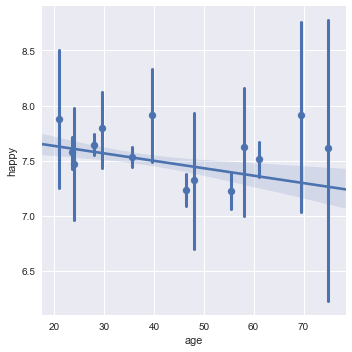

In [21]:
sns.lmplot(x="age", y="happy", data=training, x_estimator=np.mean, order=1)

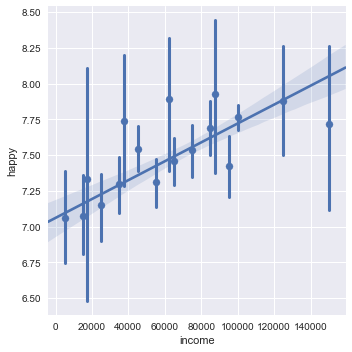

In [22]:
sns.lmplot(x="income", y="happy", data=training, x_estimator=np.mean, order=1)

In [23]:
model = ols("happy ~ age + income", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  happy   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     37.48
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           6.82e-17
Time:                        18:16:44   Log-Likelihood:                -11250.
No. Observations:                5483   AIC:                         2.251e+04
Df Residuals:                    5480   BIC:                         2.253e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2573      0.105     68.890      0.000       7.051       7.464
age           -0.0044      0.002     -2.226      0.026      -0.008      -0.001
income      6.338e-06   7.98e-07      7.945      0.000    4.77e-06     7.9e-06
==============================================================================
Omnibus:                      769.269   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.029
Skew:                          -0.979   Prob(JB):                    2.90e-263
Kurtosis:                       4.208   Cond. No.                     3.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("happy", axis=1).as_matrix(columns=None)
labels_train = training["happy"].as_matrix(columns=None)

features_test = holdout.drop("happy", axis=1).as_matrix(columns=None)
labels_test = holdout["happy"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.0134935841022
Accuracy: 0.0132611014339


## sat_lin_df

In [25]:
data = sat_lin_df

data = data[data["satisfied"]<=10]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

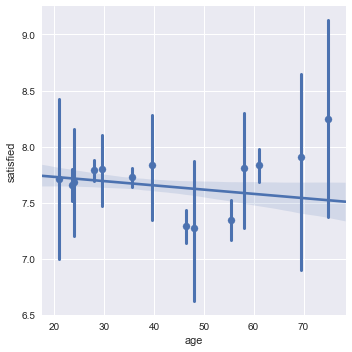

In [26]:
sns.lmplot(x="age", y="satisfied", data=training, x_estimator=np.mean, order=1)

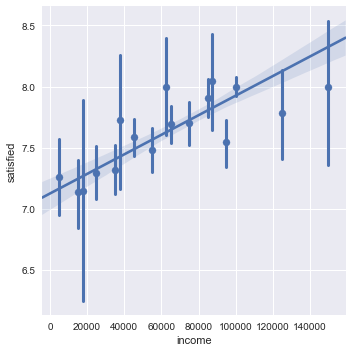

In [27]:
sns.lmplot(x="income", y="satisfied", data=training, x_estimator=np.mean, order=1)

In [28]:
model = ols("satisfied ~ age + income", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              satisfied   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     53.79
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           7.32e-24
Time:                        18:16:48   Log-Likelihood:                -11123.
No. Observations:                5486   AIC:                         2.225e+04
Df Residuals:                    5483   BIC:                         2.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1577      0.103     69.261      0.000       6.955       7.360
age           -0.0007      0.002     -0.359      0.719      -0.004       0.003
income      7.948e-06   7.81e-07     10.180      0.000    6.42e-06    9.48e-06
==============================================================================
Omnibus:                      844.442   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1382.852
Skew:                          -1.038   Prob(JB):                    5.22e-301
Kurtosis:                       4.319   Cond. No.                     3.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Rerun with SciKitLearn because it's easy to check accuracy

features_train = training.drop("satisfied", axis=1).as_matrix(columns=None)
labels_train = training["satisfied"].as_matrix(columns=None)

features_test = holdout.drop("satisfied", axis=1).as_matrix(columns=None)
labels_test = holdout["satisfied"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.0192437725512
Accuracy: 0.0151930716305


## happy_class_df

Percentage of Ys: 0.9210662973861866



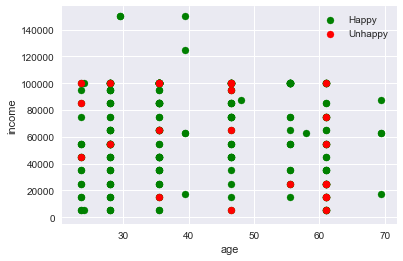

In [30]:
data = happy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("happy_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["happy_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("happy_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["happy_Y_N"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["happy_Y_N"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Happy")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unhappy")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.show()


Logistic Regression
Accuracey: 0.920415224913

True Negatives: 0
False Positives: 23
False Negatives: 0
True Positives: 266
Recall: 0.920415224913
Precision: 1.0
F1 Score: 0.958558558559


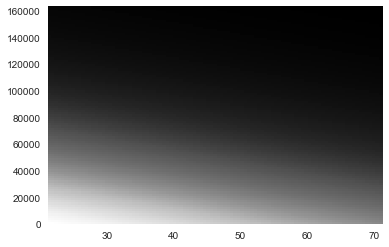


Y
0.995900268082


Decision Tree
Accuracey: 0.916955017301

True Negatives: 0
False Positives: 23
False Negatives: 1
True Positives: 265
Recall: 0.920138888889
Precision: 0.996240601504
F1 Score: 0.956678700361


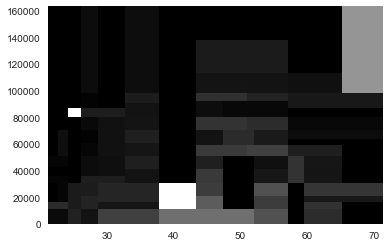

Random Forest
Accuracey: 0.916955017301

True Negatives: 0
False Positives: 23
False Negatives: 1
True Positives: 265
Recall: 0.920138888889
Precision: 0.996240601504
F1 Score: 0.956678700361


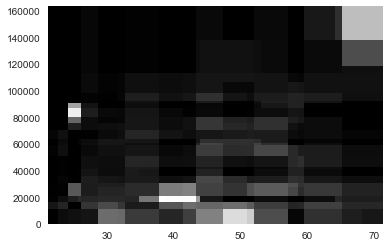

SVM
Accuracey: 0.916955017301

True Negatives: 0
False Positives: 23
False Negatives: 1
True Positives: 265
Recall: 0.920138888889
Precision: 0.996240601504
F1 Score: 0.956678700361


In [31]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM

## sat_class_df

Percentage of Ys: 0.9324909122381859



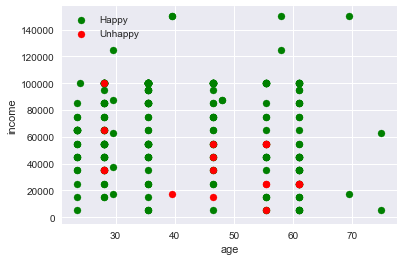

In [32]:
data = sat_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("satisfied_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["satisfied_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("satisfied_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["satisfied_Y_N"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["satisfied_Y_N"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Happy")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unhappy")
plt.legend()
plt.xlabel("age")
plt.ylabel("income")
plt.show()

Logistic Regression
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


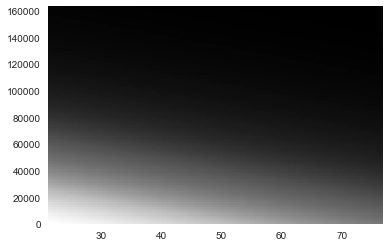


Y
0.997643889301


Decision Tree
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


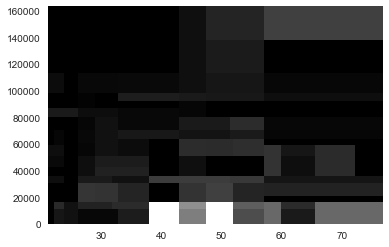

Random Forest
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


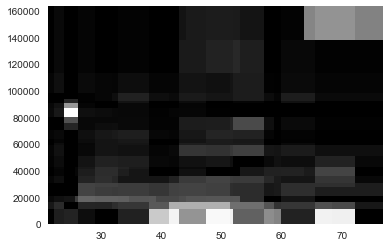

SVM
Accuracey: 0.937716262976

True Negatives: 0
False Positives: 18
False Negatives: 0
True Positives: 271
Recall: 0.937716262976
Precision: 1.0
F1 Score: 0.967857142857


In [33]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM